In [34]:
import numpy as np
import matplotlib.pyplot as plt 
#%matplotlib notebook
%matplotlib widget
from astropy.io import fits

In [35]:
bias_list = np.genfromtxt('./bias/bias.list', dtype=str)
print(bias_list)


['AF87078.fits' 'AF87079.fits' 'AF87080.fits' 'AF87081.fits'
 'AF87082.fits' 'AF87083.fits' 'AF87084.fits' 'AF87085.fits'
 'AF87086.fits' 'AF87087.fits' 'AF87088.fits' 'AF87089.fits'
 'AF87090.fits' 'AF87091.fits' 'AF87092.fits' 'AF87093.fits'
 'AF87094.fits' 'AF87095.fits' 'AF87096.fits' 'AF87097.fits'
 'AF87098.fits' 'AF87099.fits' 'AF87100.fits' 'AF87101.fits'
 'AF87102.fits' 'AF87103.fits' 'AF87104.fits' 'AF87105.fits'
 'AF87106.fits' 'AF87107.fits']


#### What is FITS format

A data file in FITS format consists of a series of Header Data Units (HDUs), each containing two components: an ASCII text header and the binary data. The header contains a series of header keywords that describe the data in a particular HDU and the data component immediately follows the header.
![Pic](image.jpg)

In [36]:
bias00_fits = fits.open('./bias/'+bias_list[0])

# store the Primary HDU of the fits file into a variable named bias00_hdu
bias00_hdu = bias00_fits[0]
print(bias00_hdu)

In [37]:
bias00_hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  534 / length of data axis 1                          
NAXIS2  =                  180 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2011-03-09T17:56:02' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
UTSTART = '2011-03-09T17:56:00.4' / UT date at start of exposure                
DATE-OBS= '09/03/11'        

In [38]:
bias00_time = bias00_hdu.header['JD']
bias00_airmass = bias00_hdu.header['AIRMASS']

bias00_gain  = bias00_hdu.header['GAIN']
bias00_gain_comment = bias00_hdu.header.comments['GAIN']

bias00_readout_noise = bias00_hdu.header['RDNOISE']
bias00_ron_comment = bias00_hdu.header.comments['RDNOISE']

print('Julian date      : {0:12.6f} JD'.format(bias00_time))
print('CCD Gain         : {0:4.2f} {1:.8s}'.format(bias00_gain,bias00_gain_comment))
print('CCD Readout noise: {0:4.2f} {1:.3s}'.format(bias00_readout_noise,bias00_ron_comment))

#print(time, airmass, gain, readout_noise)

Julian date      : 2455630.247227 JD
CCD Gain         : 2.73 [e/ADU] 
CCD Readout noise: 7.60 [e]


In [39]:
#bias00_sitelat = bias00_hdu.header['SITELAT']
#print('test: '.format(bias00_sitelat))

# data stored in bias frame integer numbers
bias00_hdu.data

# converted
bias00_hdu.data * bias00_hdu.header['GAIN']

# convert hdu into electrons
bias00_data = bias00_hdu.data * bias00_hdu.header['GAIN']

#### Understanding the shape of an image/array in Python
* open and save them somewhere in the Random Access Memory 
* create a buffer or stack with enough space (=correct dimensions) to keep all the images

* shape of the array in the memory of the computer may be different from the sizeas we perceive it when. Depends if the programming language 

* for CCD images the first index indicates the x coordinate (i.e., the column), and the second indicates the y position (i.e., the row)
* for matrices in mathematical notation, the first index indicates the row, and the second indicates the column

* how to store in computers multidimensional arrays in linear storage such as random access memory: Row-Major Order, Column-Major Order
```
     1  2  3
     4  5  6
     7  8  9
```
In row-major order, this will be stored in memory as: 1, 2, 3, 4, 5, 6, 7, 8, 9.
In column-major order, this will be stored in memory as: 1, 4, 7, 2, 5, 8, 3, 6, 9.

[wiki](https://en.wikipedia.org/wiki/Row-_and_column-major_order)


In [40]:
# copmare some information 
bias00_naxis1 =  bias00_hdu.header['NAXIS1']
bias00_naxis2 =  bias00_hdu.header['NAXIS2']

print('Shape of the FITS image from the header      : {0:4d} x {1:4d}'.format(bias00_naxis1, bias00_naxis2))

Shape of the FITS image from the header      :  534 x  180


In [41]:
np.shape(bias00_data)
dim00, dim01 = np.shape(bias00_data)
# dim == dimension
print(dim00, dim01)
# numpy empty documentation https://numpy.org/devdocs/reference/generated/numpy.empty.html

# we can now see how to interpret a value in the position bias00_data[i, j]
# i is the row where our pixel is located
# j is the index of the column where our pixel is located  
# So the shape of our array is inverted with respect 
# to the coordinate systems defined in the FITS file

180 534


In [42]:
n_images = len(bias_list)

In [43]:
stack = np.empty([n_images, dim00, dim01])
# inside [] - corresponds to our shape
print(np.shape(stack))
print(stack[:,0,0])

(30, 180, 534)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [44]:
print(bias_list)

['AF87078.fits' 'AF87079.fits' 'AF87080.fits' 'AF87081.fits'
 'AF87082.fits' 'AF87083.fits' 'AF87084.fits' 'AF87085.fits'
 'AF87086.fits' 'AF87087.fits' 'AF87088.fits' 'AF87089.fits'
 'AF87090.fits' 'AF87091.fits' 'AF87092.fits' 'AF87093.fits'
 'AF87094.fits' 'AF87095.fits' 'AF87096.fits' 'AF87097.fits'
 'AF87098.fits' 'AF87099.fits' 'AF87100.fits' 'AF87101.fits'
 'AF87102.fits' 'AF87103.fits' 'AF87104.fits' 'AF87105.fits'
 'AF87106.fits' 'AF87107.fits']


In [45]:
# python enumerate https://docs.python.org/3/library/functions.html#enumerate
for i, name in enumerate(bias_list):
    # print(i, name)
    # Эта строка начинает цикл for, который проходит по элементам списка bias_list. 
    # enumerate() используется для того, чтобы получать не только 
    # каждый элемент списка bias_list (bias_name), но и его индекс (i_bias), который начинается с 0.

    bias_temp = fits.open('./bias/' + name)
    stack[i, :, :] = bias_temp[0].data * bias_temp[0].header['GAIN']
    bias_temp.close()

In [46]:
print(stack[:, 0, 0])

[977.34 982.8  971.88 974.61 982.8  974.61 988.26 971.88 960.96 963.69
 980.07 977.34 966.42 980.07 980.07 977.34 980.07 977.34 977.34 982.8
 977.34 977.34 977.34 969.15 985.53 999.18 982.8  988.26 974.61 969.15]


We use the NumPy median function == to compute the median only along the first axis (среди строки, а не столбца)

We do a final check by printing the shape of the median bias array and confirming that the shape is the same as the original bias frames

In [47]:
print(np.shape(stack))
median_bias = np.median(stack, axis=0)
print(np.shape(median_bias)) 

(30, 180, 534)
(180, 534)


#### Plotting a single bias and a median bias



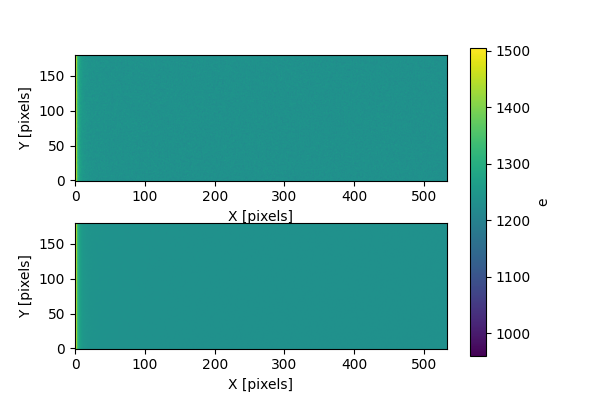

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(6,4)) # Caution, figsize will also influence positions
# Этот код создает объект фигуры (fig) и массив осей (ax) для двух графиков, 
# расположенных друг под другом (2 строки и 1 колонка). 
# Размер фигуры задается как 6x4 дюймов.

im1 = ax[0].imshow(bias00_data, vmin=960, vmax=1505, origin = 'lower')
im2 = ax[1].imshow(median_bias, vmin=960, vmax=1505, origin = 'lower')
# `imshow` для отображения данных в виде изображений
# `bias00_data` и `median_bias` — это двумерные массивы данных, 
# которые отображаются в виде изображений.
# `vmin=800` и `vmax=1800` задают минимальное и максимальное значения для 
# цветовой шкалы. Это значит, что цвета на изображении 
# будут отображаться в диапазоне значений от 800 до 1800.

cbar = fig.colorbar(im1, ax=ax)
cbar.set_label('e')
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')

ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Y [pixels]')
plt.show()

In [91]:
print(np.amin(bias00_data)) # Эта функция ищет минимальное значение в заданном массиве array. 
#Она возвращает это минимальное значение.

print(np.amax(bias00_data)) # Эта функция ищет максимальное значение в заданном массиве array. 
# Она возвращает это максимальное значение.



960.96
1504.23


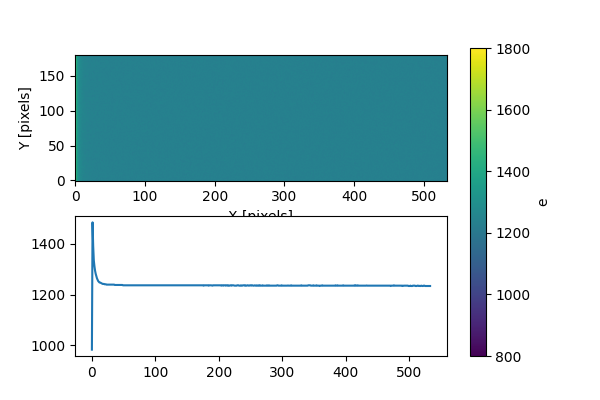

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(6,4)) 
# sets up a figure with two vertically arranged subplots, each 6x4 inches in size

im1 = ax[0].imshow(bias00_data, vmin=800, vmax=1800, origin = 'lower')
# visualizes the bias00_data array in the first subplot. 
# The imshow function is used with a specified range for color 
# values (vmin=800 and vmax=1800), and the image origin is set to 'lower', 
# which is typical for astronomical data to match the FITS convention.

# average in vertical direction

median_column = np.median(median_bias, axis=0) #вычисляет медиану median_bias по 
# вертикальной оси (т.е. для каждого столбца) и сохраняет результат в median_column 
im2 = ax[1].plot(median_column)

cbar = fig.colorbar(im1, ax=ax)
cbar.set_label('e') # указывает на единицы измерения электроны
ax[0].set_xlabel('X [pixels]') # устанавливают метки для осей X 
ax[0].set_ylabel('Y [pixels]') # и Y в первом подграфике соответственно

plt.show()

In [93]:
integer_distribution = np.random.random_integers(0, 100, 30)
print(np.median(integer_distribution))
print(np.mean(integer_distribution))

51.0
50.733333333333334


/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_4346/31595013.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  integer_distribution = np.random.random_integers(0, 100, 30)


In [94]:
# Зная, что bias не является постоянным, 
# мы все равно можем сравнить шум показаний, 
# указанный в header, и стандартное отклонение напрямую вычисленное 
# на основе данных, если ограничимся небольшим диапазоном в столбцах

starting_column = 300
ending_column = 350 
bias00_selection = bias00_hdu.data[:,starting_column:ending_column] * bias00_hdu.header['GAIN']
print(np.shape(bias00_selection))

print('Readout noise        : {0:4.2f} e'.format(bias00_readout_noise))
print('STD of a single frame: {0:4.2f} e'.format(np.std(bias00_selection)))

# The values above refer to the readout noise of a **single** exposure

(180, 50)
Readout noise        : 7.60 e
STD of a single frame: 7.38 e


In [95]:
n_frames = len(bias_list)
print(n_frames)

30


#### When using readout noise as an estimate of the error associated with each image (case 1):

$$ \sigma = \frac{\text{Readout Noise}}{\sqrt{N}} $$

Where:
- σ is the standard deviation (error) of the combined image,
- Readout Noise is the noise level for a single pixel,
- N is the number of images combined,

#### When we use the standard deviation of a bias frame (case 2):
$$
\sigma_{\text{bias}} = \frac{\text{STD (Bias Frame)}}{\sqrt{N}}
$$

Where:

- σ - bias represents the standard deviation (error) associated with the median or average bias frame,
- STD (Bias Frame) is the standard deviation of the pixel values in a single bias frame,
- N is the number of bias frames combined to form the median or master bias,


In [107]:
# The median bias is the combination of 30 individual frames, 
# so the associated error will be smaller than the one coming 
# with a single frame

#bias00_readout_noise = bias00_hdu.header['RDNOISE']
#median_bias_error_from_rdnoise = bias00_readout_noise / np.sqrt(30.)
#median_bias_error_from_std = np.std(bias00_selection) / np.sqrt(30.)                        
#print('Error associated to the median bias from RDNOISE {0:4.2f}'.format(median_bias_error_from_rdnoise))
#print('Error associated to the median bias from STD of one frame {0:4.2f}'.format(median_bias_error_from_std))

print('-----------------------')

expected_noise_medianbias = bias00_readout_noise/np.sqrt(30.)
expected_std_medianbias = np.std(bias00_data[:,starting_column:ending_column])/np.sqrt(30.)
print('1) Expected noise of median bias  : {0:4.2f} e'.format(expected_noise_medianbias))
# we use the readout noise as an estimate of the error associated with each image
print('2) Expected STD of median bias    : {0:4.2f} e'.format(expected_std_medianbias))
# we use the standard deviation of a bias frame

Error associated to the median bias from RDNOISE 1.39
Error associated to the median bias from STD of one frame 1.35
-----------------------
1) Expected noise of median bias  : 1.39 e
2) Expected STD of median bias    : 1.35 e


Alternatively, we can compute the error associated with the median bias from the data
1. **Measured Standard Deviation of Median Bias**:

   The standard deviation of the median bias for a specific column range:

   $$
   \sigma_{\text{measured, median bias}} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
   $$

   where $x_i$ represents pixel values in the specified column range of the median bias, and $\bar{x}$ is the mean of those pixel values.

2. **Standard Deviation for Each Pixel Across All Frames**:

   The standard deviation of each pixel is computed across all frames and then adjusted by the number of images:

   $$
   \sigma_{\text{pixel}} = \frac{1}{\sqrt{n_{\text{images}}}} \sqrt{\frac{1}{M-1} \sum_{j=1}^{M} (x_{ij} - \bar{x_i})^2}
   $$

   where $x_i$ is the value of pixel \( i \) in frame \( j \), $\bar{x_i}$ is the mean value of pixel \( i \), and \( M \) is the total number of frames.

3. **Median of Pixel-based Errors**:

   The median of all computed pixel-based errors gives a single value:

   $$
   \text{median\_pixel\_error} = \text{median}(\sigma_{\text{pixel}})
   $$

In [118]:
#median_bias_selection = median_bias[:, starting_column:ending_column]
#standart_deviation_central_median_bias = np.std(median_bias_selection)
#print('Standart deviation of the median bias: {0:4.2f}'.format(standart_deviation_central_median_bias))

print('-----------------------')
measured_std_medianbias = np.std(median_bias[:,starting_column:ending_column])
median_error = np.std(stack, axis=0) /np.sqrt(n_images)
median_pixel_error = np.median(median_error)

print('Measured STD of median bias    : {0:4.2f} e'.format(measured_std_medianbias))
print('Median STD of each pixel       : {0:4.2f} e'.format(median_pixel_error))

-----------------------
Measured STD of median bias    : 1.79 e
Median STD of each pixel       : 1.31 e


In [109]:
#standart deviation of each pixel??
np.shape(stack)

(30, 180, 534)

In [110]:
std_median_bias = np.std(stack, axis=0)
#std_median_bias = np.std(stack, axis=(0,1)) we will get our 534
print(np.shape(std_median_bias)) #new shape

(180, 534)


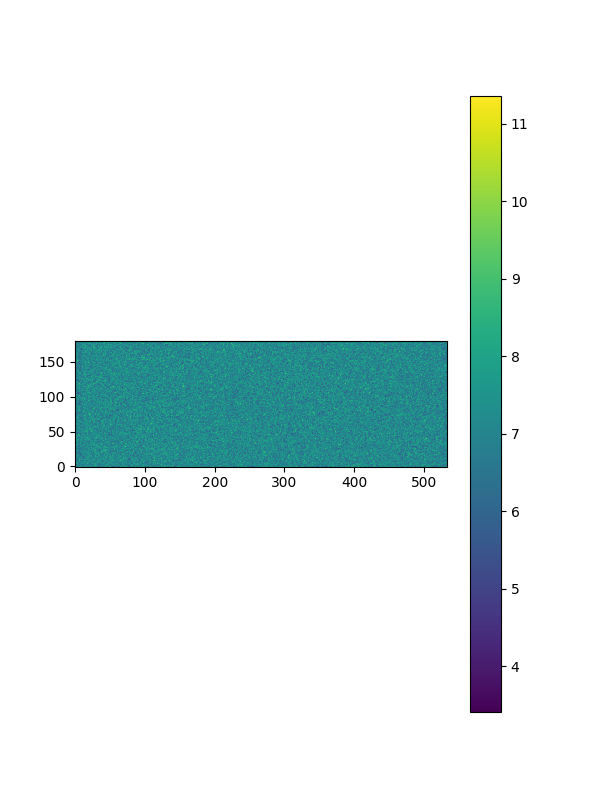

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(6,8))
iml = ax.imshow(std_median_bias, origin='lower')
cbar = fig.colorbar(iml, ax=ax)
plt.show()
#pixel by pixel associated with

/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_4346/2115501221.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


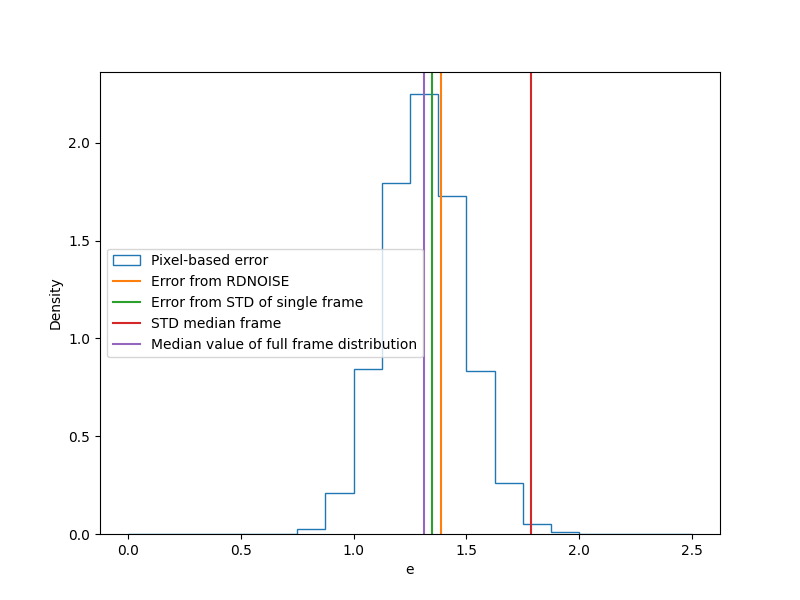

In [ ]:
# median_bias_error_from_rdnoise
# median_bias_error_from_std
# standart_deviation_central_median_bias
# fullframe_error_median_bias = np.std(stack, axis=0) / np.sqrt(30.)
# fullframe_error_median_bias = np.std(stack, axis=0) / np.sqrt(np.shape(stack)[0])

plt.figure(figsize=(8,6))
plt.hist(median_error.flatten(), bins=20, range=(0, 2.5,), density=True, histtype='step', label="Pixel-based error")
# flatten() :Эта функция преобразует многомерный массив median_error в одномерный. 
# Это нужно для того, чтобы построить гистограмму всех значений без учёта их первоначальной структуры
# bins=20: Задает количество интервалов (или "корзин") для гистограммы. В данном случае их 20,
# что определяет степень детализации визуализации распределения данных
# range=(0, 2.5): Устанавливает диапазон значений, которые будут отображены на гистограмме
# Значения ошибки за пределами этого диапазона будут игнорироваться 
# histtype='step': Определяет стиль рисования гистограммы. Параметр 'step' означает, 
# что гистограмма будет отрисована линиями без заливки.

plt.axvline(expected_noise_medianbias, c='C1', label='Error from RDNOISE')
plt.axvline(expected_std_medianbias, c='C2', label='Error from STD of single frame')
plt.axvline(measured_std_medianbias, c='C3', label='STD median frame')
plt.axvline(median_pixel_error, c='C4', label='Median value of full frame distribution')


plt.xlabel('e')
plt.ylabel('Density')
plt.legend()
plt.show()
# flatten: 2 dimensional array -> 1 dimensional array 

In [113]:
import pickle

In [122]:
pickle.dump(median_bias, open("median_bias.p", "wb"))
pickle.dump(median_error, open("median_bias_error.p", "wb"))
pickle.dump(median_pixel_error, open("median_bias_error_value.p", "wb")) 
pickle.dump(stack, open("bias_stack.p", "wb"))


#pickle.dump(median_bias, open("median_bias.p", "wb")) 
#pickle.dump(median_error, open("median_bias_error.p", "wb")) 
#pickle.dump(median_pixel_error, open("median_bias_error_value.p", "wb")) 
#pickle.dump(stack, open("stack_bias.p", "wb")) 

In [115]:
median_bias_from_HD = pickle.load(open("median_bias.p", "rb"))

In [116]:
print(median_bias[5,6:10])
print(median_bias_from_HD[5,6:10])

[1284.465 1270.815 1263.99  1258.53 ]
[1284.465 1270.815 1263.99  1258.53 ]


In [117]:
print(np.shape(median_bias))
print(np.shape(median_bias_from_HD))

(180, 534)
(180, 534)
